In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# OPTION A

In [7]:
from pandas import *
import random

In [3]:
def makePopulation(N,popSize): ##making genomes of N size(combinations of 0 and 1s) for every individual in population
    population=list()
    for p in range(popSize):
        genome=list() #holds all of the genomes
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(10,10)

[[1, 0, 0, 0, 0, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 0, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 0, 0, 1, 1, 0, 0, 1, 1]]


In [23]:
def computefitness(genome): #summing numbers in genome to define "relative" fitness, e.g. so that genome of size 80 is not necessarily have higher fitness than a genome of size 10
    fitness=sum(genome)/float(len(genome)) #to be able to compare across genome sizes
    return fitness

print computefitness([0,0,1,0,0,0,1,1,1,0])

0.4


In [24]:
def makeMutant(genome,mutationRate): #mutating each genome at each position by changing 0 to a 1 or 1 to a 0 if random.uniform<mutationRate
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)


print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]


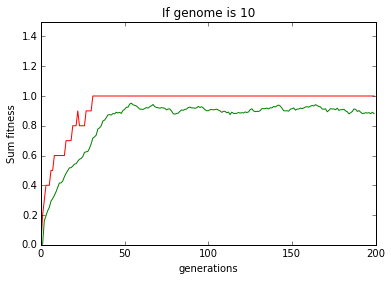

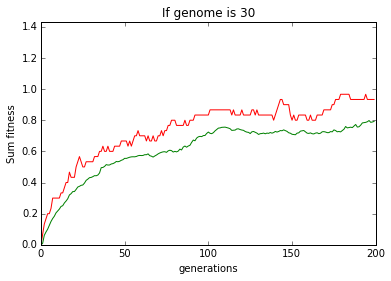

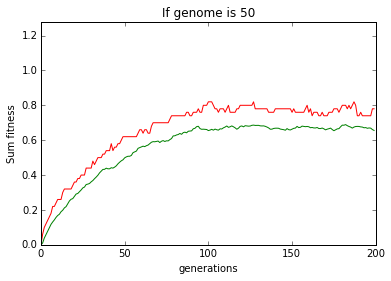

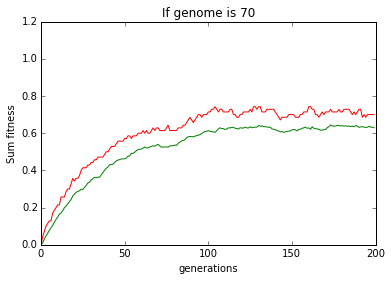

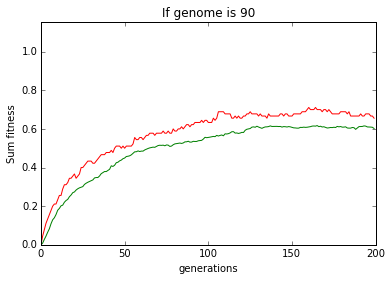

In [29]:
random.seed(0)
DifferentNs=[10,30,50,70,90]
for N in DifferentNs:
    #create a population/all the genomes
    popSize=100
    population=makePopulation(N,popSize) 
    generations=200
    mutationRate=0.01

    meanW=list()
    maxW=list()

    #computing the fitness of each genome for every individual in population for every generation and keeping track of mean and max fitness
    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computefitness(population[i]))


        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)

    #introducing mutations to the genomes in the population, and seeing how that affects mean and max fitness    
        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
    
    figure()
    title("If genome is {0}".format(N))
    plot(meanW,'g')
    plot(maxW,'r')
    ylim(0,highestFitness+0.5)
    xlabel("generations")
    ylabel("Sum fitness")

Max fitness decreases as genome size increases (harder to obtain fittest organisms )
the fitness of genome can simply be fitness=sum(genome) (in compute fitness function)